In [3]:
import importlib
import src.data_loader
importlib.reload(src.data_loader)

<module 'src.data_loader' from 'c:\\Users\\vijay\\customer-churn-prediction\\src\\data_loader.py'>

In [4]:
# Import and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
import os
warnings.filterwarnings('ignore')
sys.path.append(os.path.abspath('..'))
from src.data_loader import ChurnDataLoader

%matplotlib inline
sns.set_style('whitegrid')

loader = ChurnDataLoader()
df = loader.load_dataset()
df.head()

Dataset saved to data/telco-churn.csv

 Dataset Info:
 Shape: (7043, 21) rows, (7043, 21) columns
Dataset saved to data/telco-churn.csv

 Dataset Info:
 Shape: (7043, 21) rows, (7043, 21) columns
 Missing Values: 0
 Churn distribution:
 Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64
 Missing Values: 0
 Churn distribution:
 Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Exploratory Data Analysis
print("Data Types: ", df.dtypes)
print("\n Unique values per colunm: ", df.nunique())

# Seperate numeric and Categorical columns
numeric_cols = df.select_dtypes(include = [np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include = ['object']).columns.tolist()

print(f"\n Numeric columns: ({len(numeric_cols)}): {numeric_cols}")
print(f"\n Categorical columns: ({len(categorical_cols)}): {categorical_cols}")

Data Types:  customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

 Unique values per colunm:  customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
Stream

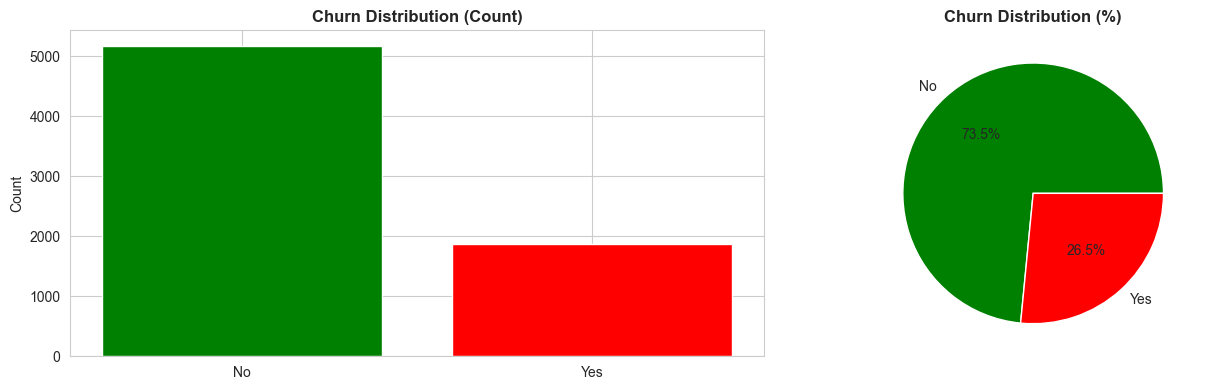


 Churn Rate: 26.54%


In [8]:
# CHurn Distribution
fig, axes = plt.subplots(1,2, figsize=(14,4))

# Count plot
churn_counts = df['Churn'].value_counts()
axes[0].bar(churn_counts.index, churn_counts.values, color  = ['green', 'red'])
axes[0].set_title('Churn Distribution (Count)', fontsize=12, fontweight = 'bold')
axes[0].set_ylabel('Count')

# Percentage
churn_pct = df['Churn'].value_counts(normalize = True) * 100
axes[1].pie(churn_pct.values, labels = churn_pct.index, autopct = '%1.1f%%', colors= ['green','red'])
axes[1].set_title('Churn Distribution (%)', fontsize = 12, fontweight = 'bold')

plt.tight_layout()
plt.show()

print(f"\n Churn Rate: {(df['Churn'] == 'Yes').mean() * 100:.2f}%")

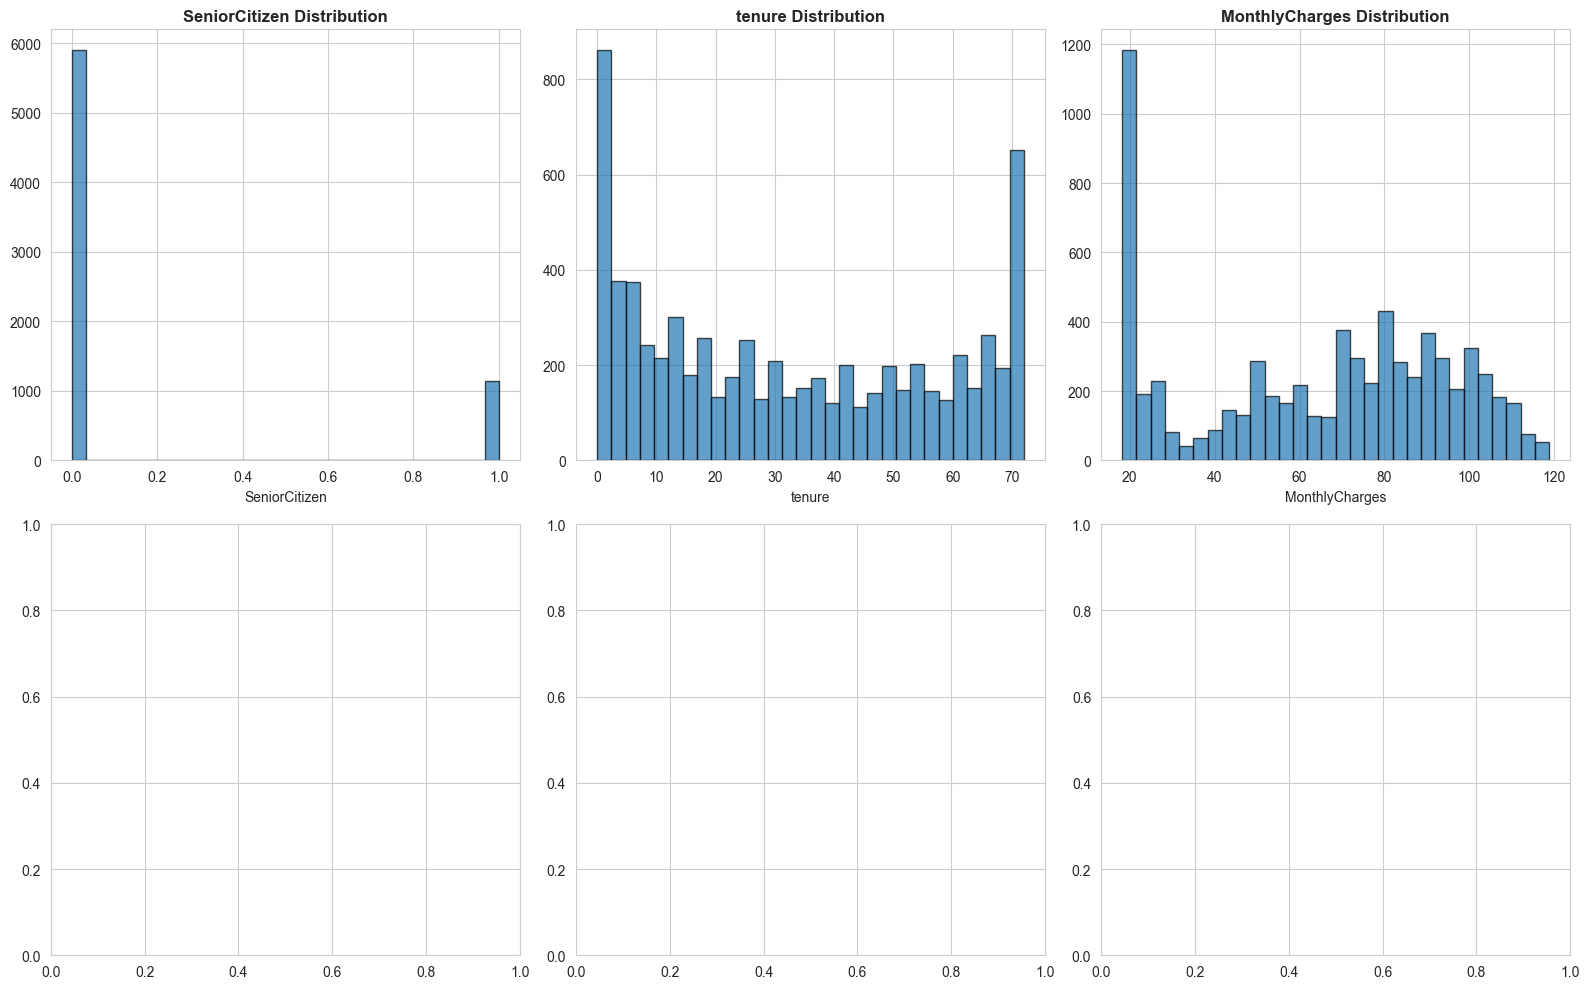

In [12]:
# Numeric Features Analysis
fig, axes = plt.subplots(2,3, figsize=(16,10))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols[:6]):
    axes[idx].hist(df[col], bins = 30, edgecolor = 'black', alpha = 0.7)
    axes[idx].set_title(f'{col} Distribution', fontweight = 'bold')
    axes[idx].set_xlabel(col)

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


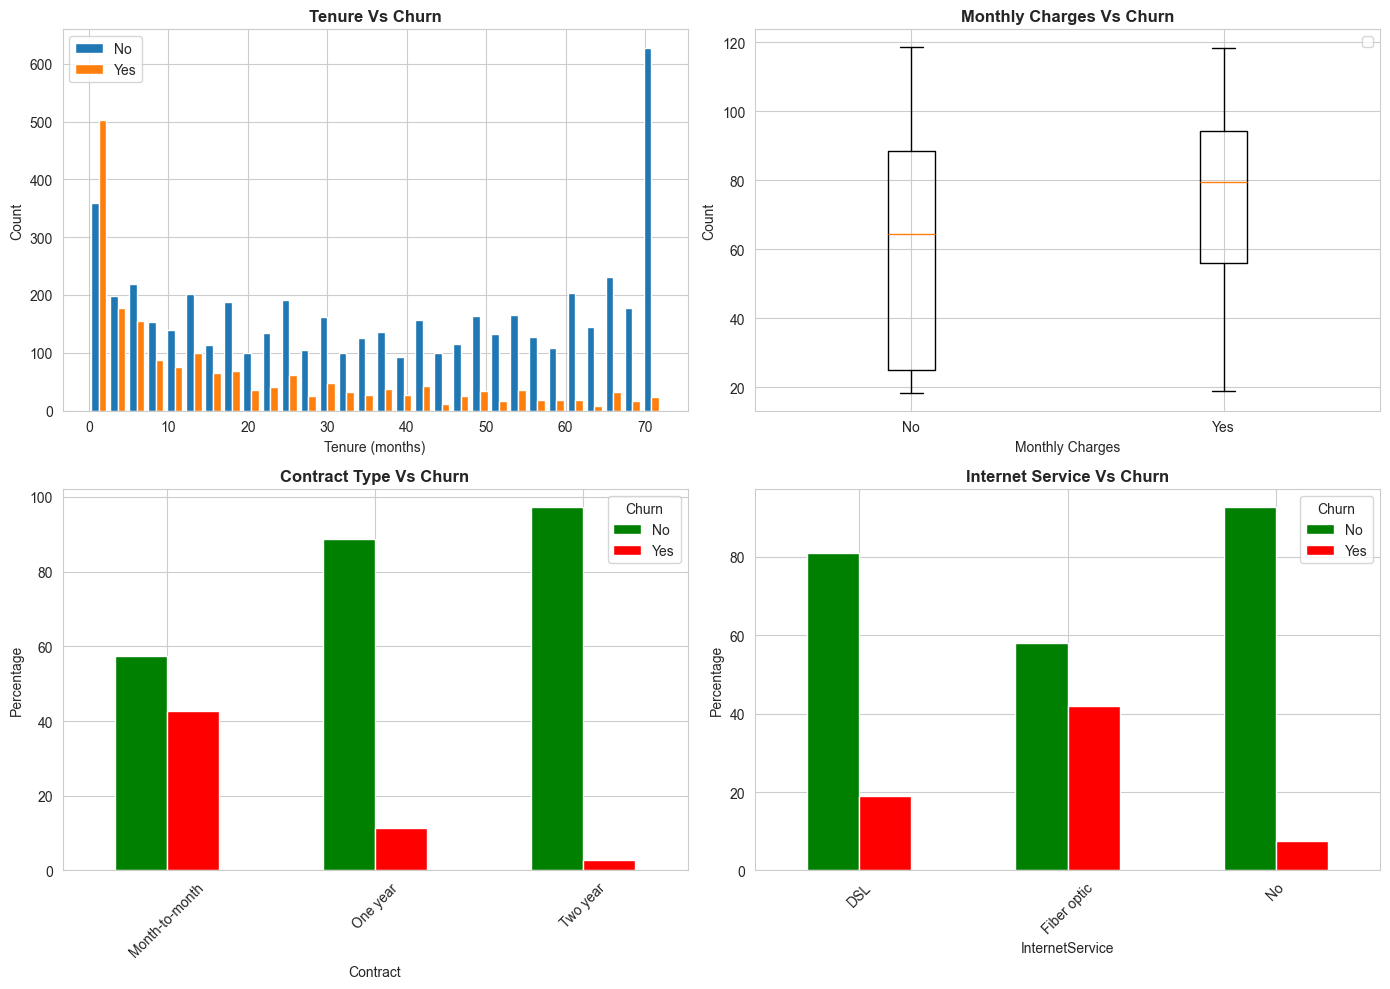

In [15]:
# Churn by Key Features
fig, axes = plt.subplots(2,2, figsize=(14,10))

# Tenure Vs Churn
axes[0,0].hist([df[df['Churn'] == 'No']['tenure'], 
                df[df['Churn'] == 'Yes']['tenure']], 
                label = ['No', 'Yes'], bins = 30)
                
axes[0,0].set_title('Tenure Vs Churn', fontweight = 'bold')
axes[0,0].set_xlabel('Tenure (months)')
axes[0,0].set_ylabel('Count')
axes[0,0].legend()

# Monthly Charges Vs Churn
axes[0,1].boxplot([df[df['Churn'] == 'No']['MonthlyCharges'], 
                df[df['Churn'] == 'Yes']['MonthlyCharges']], 
                labels = ['No', 'Yes'])
axes[0,1].set_title('Monthly Charges Vs Churn', fontweight = 'bold')
axes[0,1].set_xlabel('Monthly Charges')
axes[0,1].set_ylabel('Count')
axes[0,1].legend()

# Contract Type Vs Churn
contract_churn = pd.crosstab(df['Contract'], df['Churn'],normalize = 'index') * 100
contract_churn.plot(kind = 'bar', ax = axes[1,0], color = ['green', 'red'])
axes[1,0].set_title('Contract Type Vs Churn', fontweight = 'bold')
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation = 45)
axes[1,0].set_ylabel('Percentage')

# Internet Service Vs Churn
internet_churn = pd.crosstab(df['InternetService'], df['Churn'],normalize = 'index') * 100
internet_churn.plot(kind = 'bar', ax = axes[1,1], color = ['green', 'red'])
axes[1,1].set_title('Internet Service Vs Churn', fontweight = 'bold')
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation = 45)
axes[1,1].set_ylabel('Percentage')

plt.tight_layout()
plt.show()





In [16]:
# Key Insights from EDA

print("Key Insights from EDA: ")
print(f"\n1. Tenure Impact: -Customers churned: avg tenure = {df[df['Churn'] == 'Yes']['tenure'].mean():.2f} months")
print(f"- Customers retained: avg tenure = {df[df['Churn'] == 'No']['tenure'].mean():.2f} months ")

print(f"\n2. Monthly Charges Impact: - Customers churned: avg monthly charges = {df[df['Churn'] == 'Yes']['MonthlyCharges'].mean():.2f} ")
print(f"- Customers retained: avg monthly charges = {df[df['Churn'] == 'No']['MonthlyCharges'].mean():.2f} ")

print(f"\n3. Contract Type Impact:")
contract_churn_rate = df.groupby('Contract')['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)
print(contract_churn_rate)

print("\n4. Internet Service Impact:")
internet_churn_rate = df.groupby('InternetService')['Churn'].apply(lambda x: (x=='Yes').sum() / len(x) * 100)
print(internet_churn_rate)

Key Insights from EDA: 

1. Tenure Impact: -Customers churned: avg tenure = 17.98 months
- Customers retained: avg tenure = 37.57 months 

2. Monthly Charges Impact: - Customers churned: avg monthly charges = 74.44 
- Customers retained: avg monthly charges = 61.27 

3. Contract Type Impact:
Contract
Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: Churn, dtype: float64

4. Internet Service Impact:
InternetService
DSL            18.959108
Fiber optic    41.892765
No              7.404980
Name: Churn, dtype: float64
